# Week 1: data and distributions

In this notebook we will be cleaning, mearging and visualising the 'steps' and 'survey' csv. 

In [590]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('steps.csv', sep=';')#read steps csv,set the steps.csv to an European format
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [591]:
df2 = pd.read_csv('survey.csv')#read survey csv
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


Before we can look if there is any colleration between steps and the weight of praticipants we first have to sum their steps.

In [592]:
df_total_steps = df1.sum(axis=1).reset_index(name='total steps')#sum steps per participant and name column
df_total_steps.rename(columns={'index':'id'}, inplace=True)#rename column to 'id', to use this later for merging 
print(df_total_steps)

      id  total steps
0      0    1683912.0
1      1     927052.0
2      2    1228659.0
3      3      72668.0
4      4     286860.0
..   ...          ...
924  924     572599.0
925  925     240920.0
926  926    2057144.0
927  927    1270982.0
928  928    1040001.0

[929 rows x 2 columns]


Now we merge the steps and survey csv to look if there is any colleration between the steps and the height of the participants. 

In [593]:
df = pd.merge(df_total_steps, df2, on = 'id')#'id' is the common identifier
df = df[['height','total steps']].copy()#add total steps and weight to df
df.head()

,height,total steps
0,178.0,927052.0
1,180.0,1228659.0
2,180.0,72668.0
3,178.0,286860.0
4,167.0,1822008.0


In [594]:
df.sort_values('height').dropna()#start with the smallest height and drop NaN values 

,height,total steps
303,145.0,238210.0
907,150.0,1164735.0
67,150.0,70666.0
875,151.0,32950.0
330,152.0,1501542.0
...,...,...
925,192.0,2057144.0
549,193.0,9377.0
38,195.0,21473.0
918,195.0,1612832.0


By using a violinplot we can get a clear understanding of the distribution of the steps and potential outliers.

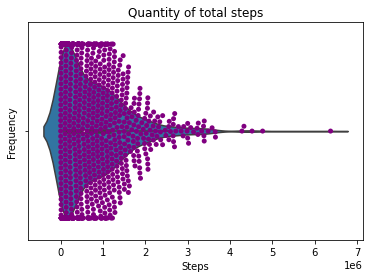

In [595]:
df_total_steps = df[df['total steps'] > 0] #Subsetting the dataframe to include participators with steps
sns.violinplot(df_total_steps['total steps'])
sns.swarmplot(df_total_steps['total steps'], color='purple') #default color doesn't stand out
plt.title('Quantity of total steps')
plt.ylabel('Frequency')
plt.xlabel('Steps')

plt.show()

The distribution appears to be unimodale: there is a large group who has a total of steps between 0 and 2.0$\times10^6$, and there is a small group with an amount of connections above 2.0$\times10^6$. There is one outlier that has around 6.3$\times10^6$. The steps are right-skewed and there is one large outliners.

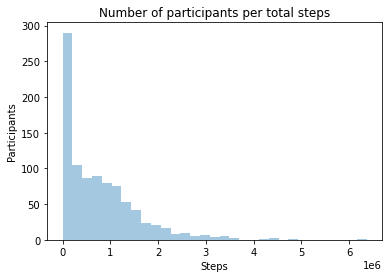

In [602]:
sns.distplot(df['total steps'], kde=False) #Selecting the total steps column
plt.title('Number of participants per total steps')
plt.xlabel('Steps')
plt.ylabel('Participants')
plt.show()

Notes about this distribution:
-  It has 1 peak (or mode - unimodal)
-  It has a 'tail' on the right (right-skewed)
-  Skewness > 0
-  Mean > median > mode


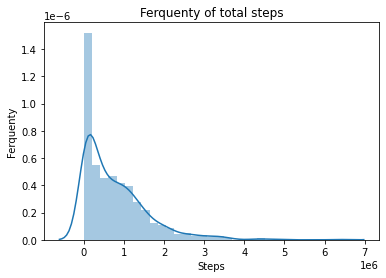

In [597]:
sns.distplot(df['total steps'])
plt.title('Ferquenty of total steps')
plt.ylabel('Ferquenty')
plt.xlabel('Steps')
plt.show() 

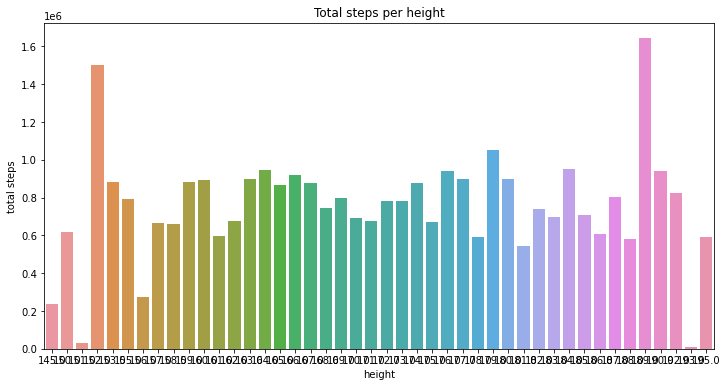

In [598]:
fig, ax = plt.subplots(figsize = (12,6))#set figure size  
fig = sns.barplot(x = 'height', y = 'total steps', data = df, ci = None)

plt.title('Total steps per height')#set title 

plt.show()#plot figure

As we can see in this barplot the steps per height appear to be bimodal: there is one large group on the left side and one large group on the right side. Therefore, we can say that there is no colleration between the steps and height.

In [599]:
df_mean = df1.transpose()# switch row and columns
df_mean = df_mean.mean(axis=1).reset_index().iloc[1:]#reset index and drop first row
df_mean.rename(columns={'index':'date'}, inplace=True)#rename index column 
df_mean.rename(columns={0:'mean'}, inplace=True)#rename 0 column 
df_mean = df_mean.dropna()#drop NaN values 

df_mean['date'] = pd.to_datetime(df_mean['date'])#set date to datetime 

print(df_mean)


          date          mean
1   2013-06-20   3642.416667
2   2013-06-21   9034.724280
3   2013-06-22  10889.636691
4   2013-06-23   7402.847973
5   2013-06-24   8110.370056
..         ...           ...
323 2014-08-05   7209.693878
324 2014-09-05   9570.690141
325 2014-10-05   7614.848837
326 2014-11-05   6805.925926
327 2014-12-05   7505.530303

[327 rows x 2 columns]


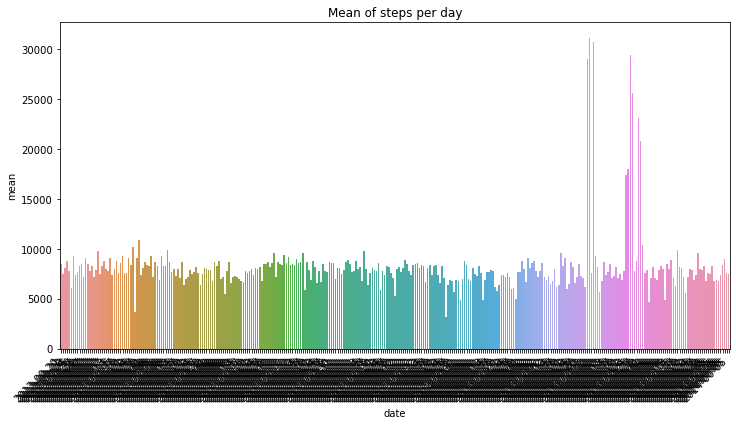

In [601]:
fig, ax = plt.subplots(figsize = (12,6))#set figure size  
fig = sns.barplot(x = 'date', y = 'mean', data = df_mean, ci = None)

x_dates = df_mean['date'].dt.strftime('%Y-%M-%d')#set datetime values for xaxis

plt.title('Mean of steps per day')#set title 

ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')#set labels for xaxis and rotate 

plt.show()#plot figure

This time serie shows use the mean of steps per day. Here we notice some larger outliers at the right side of the plot.